In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const
plt.rcParams['figure.dpi'] = 150

In [9]:
Data_names = []
for (dir_path, dir_names, file_names) in os.walk('./Labday_2_measurements_2'):
    Data_names.extend(file_names)

In [10]:
Data_list = []

for i, Data_name in enumerate(Data_names):
    Data = np.loadtxt('Labday_2_measurements_2/' + Data_name, skiprows = 3)
    Data_list.append(Data)

In [11]:
c_light = const.c
eps0 = const.epsilon_0
T = 0.5
R = 0.5
I_av = [np.mean(i) for i in Data_list]
# Guess values for function
a_guess = (1/4)*c_light*eps0*9.9**2
b_guess = (2*np.pi) #/(600e-7)


In [12]:
Time=Data[:,0]
V1=Data[:,1]
V2=Data[:,2]

In [13]:
Intensity = c_light*eps0*np.absolute(V1+V2)**2
Intensity

array([0.27458508, 0.28409923, 0.27364257, ..., 0.2399089 , 0.2399089 ,
       0.2399089 ])

([<matplotlib.axis.XTick at 0x7f0611e646d0>,
 [Text(0.0, 0, '0.0$\\pi$'),
  Text(3.141592653589793, 0, '1.0$\\pi$'),
  Text(6.283185307179586, 0, '2.0$\\pi$'),
  Text(9.42477796076938, 0, '3.0$\\pi$')])

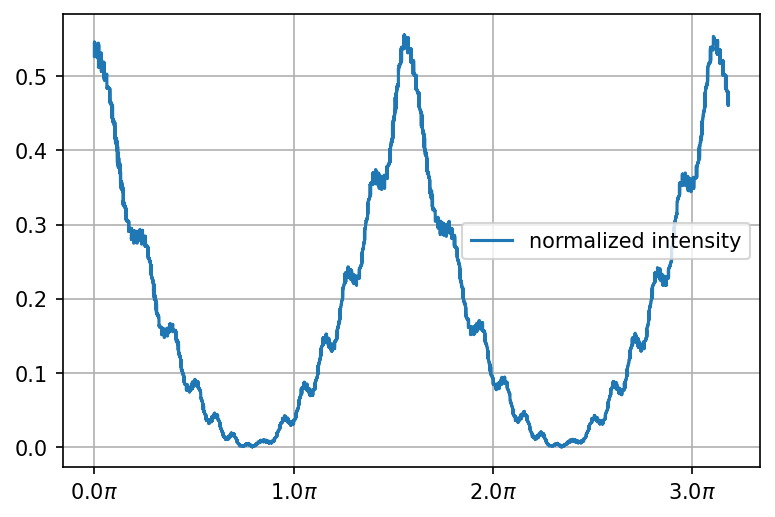

In [16]:
plt.figure() #plot raw data
plt.plot(Time, (Intensity/2)/(c_light*eps0*9.9**2), label = "normalized intensity")
plt.grid()
plt.legend()
 # Scale x-axis ticks in terms of π
pi_ticks = np.arange(0, np.max(Data[:, 0]), np.pi)
plt.xticks(pi_ticks, labels=[f'{tick / np.pi}$\pi$' for tick in pi_ticks])


/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parame

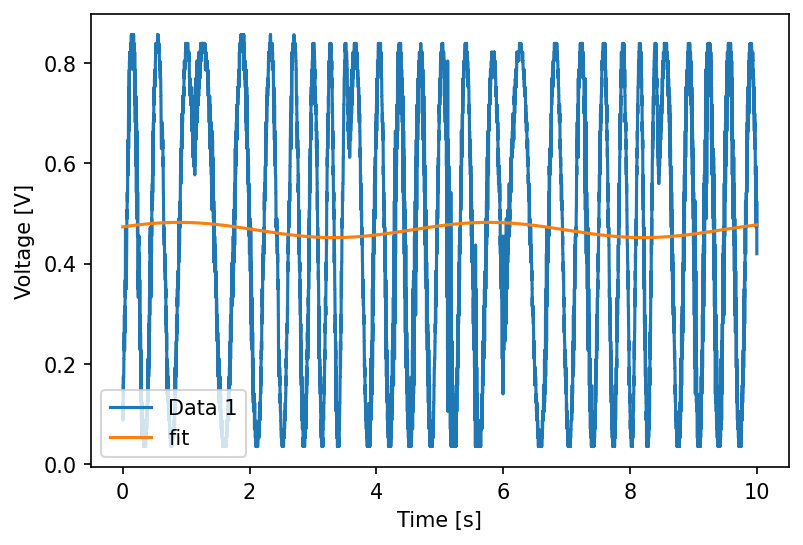

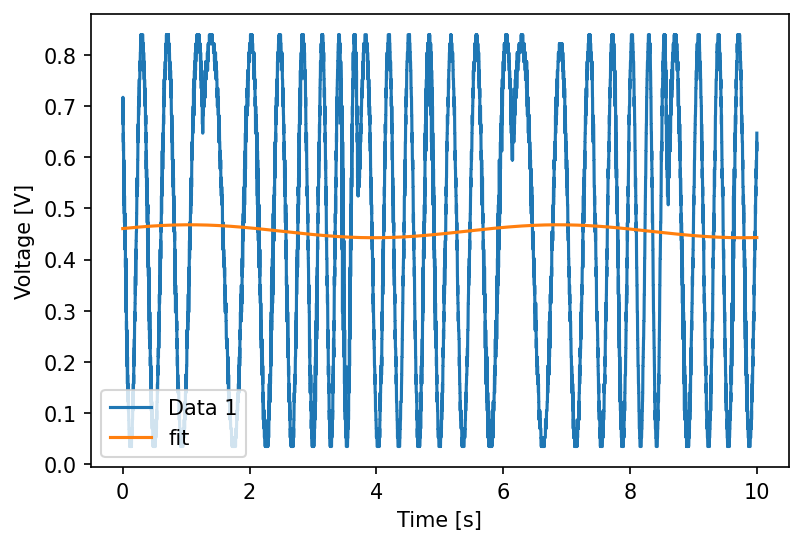

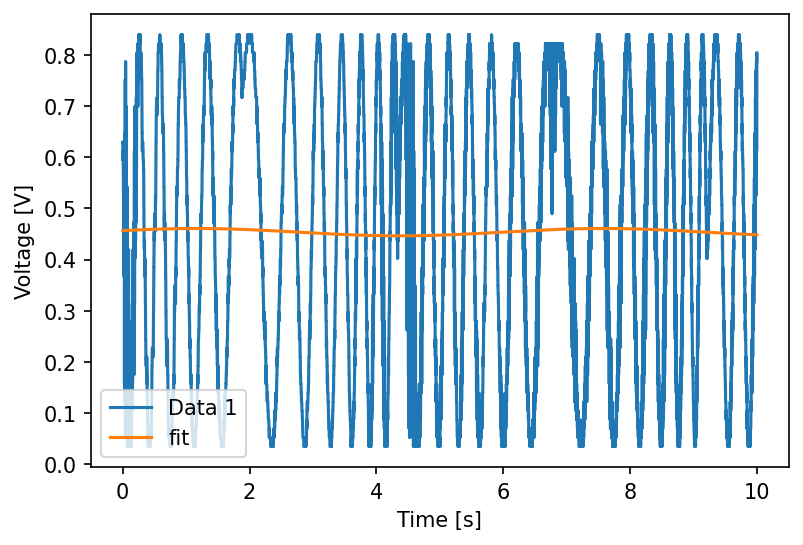

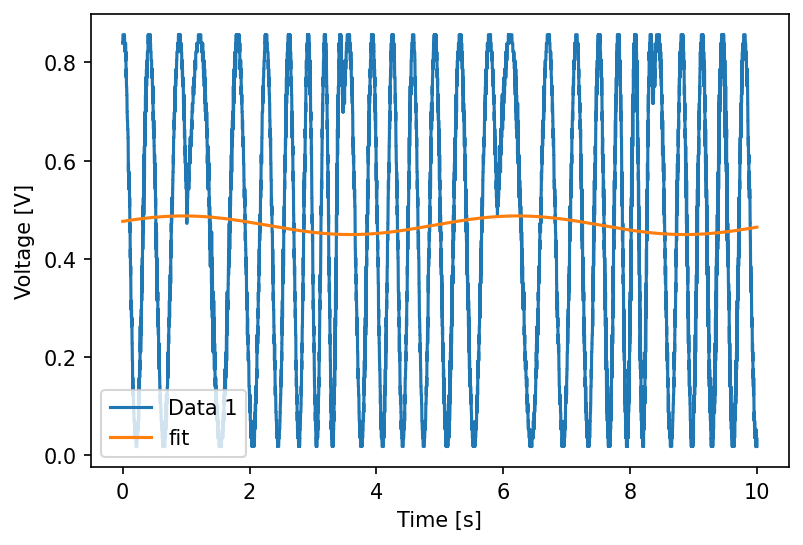

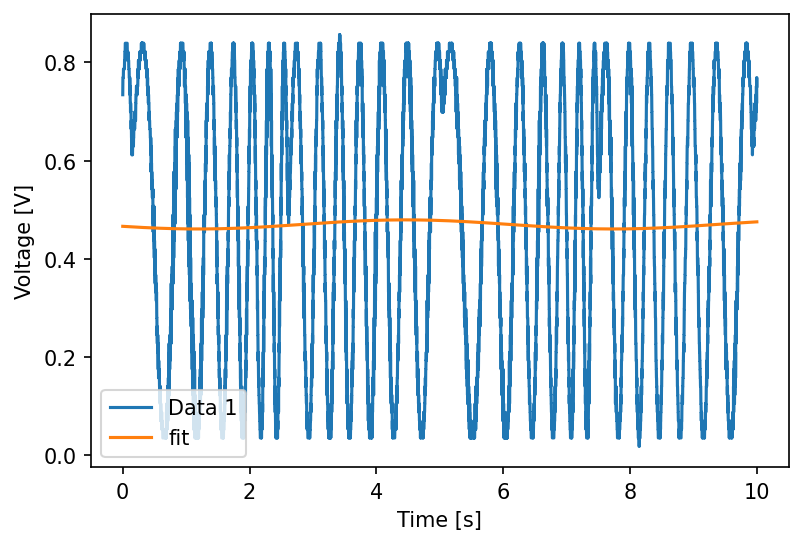

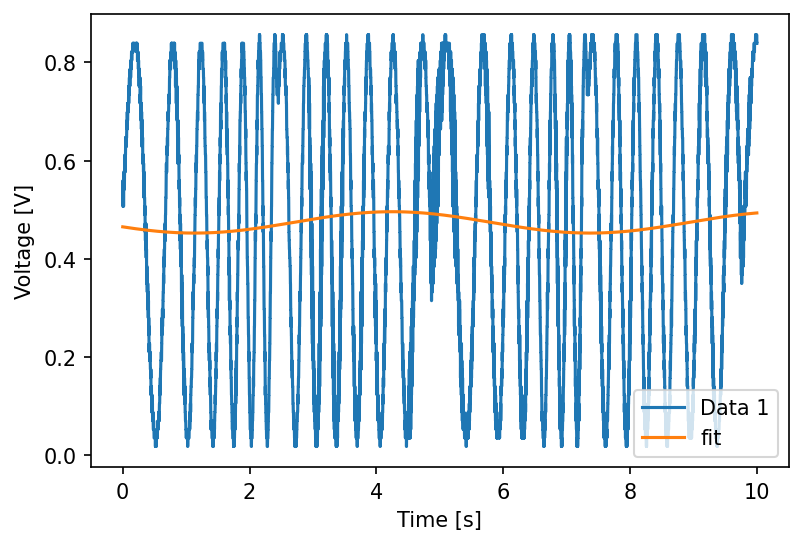

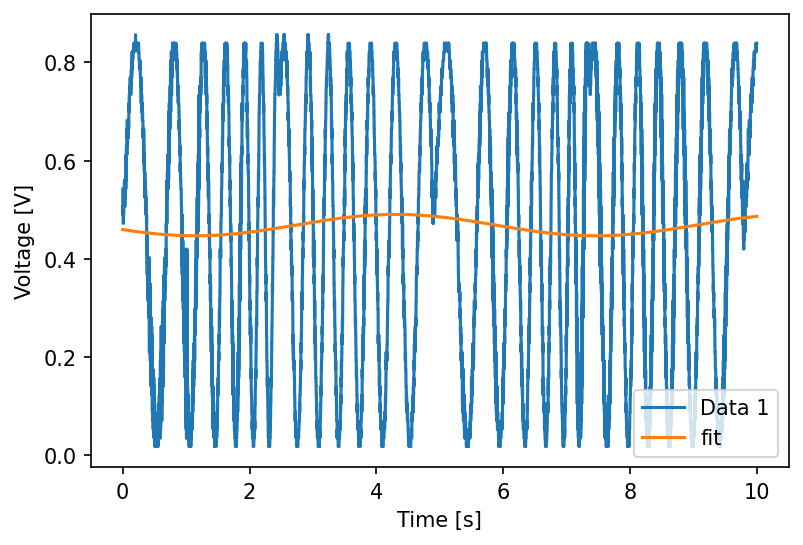

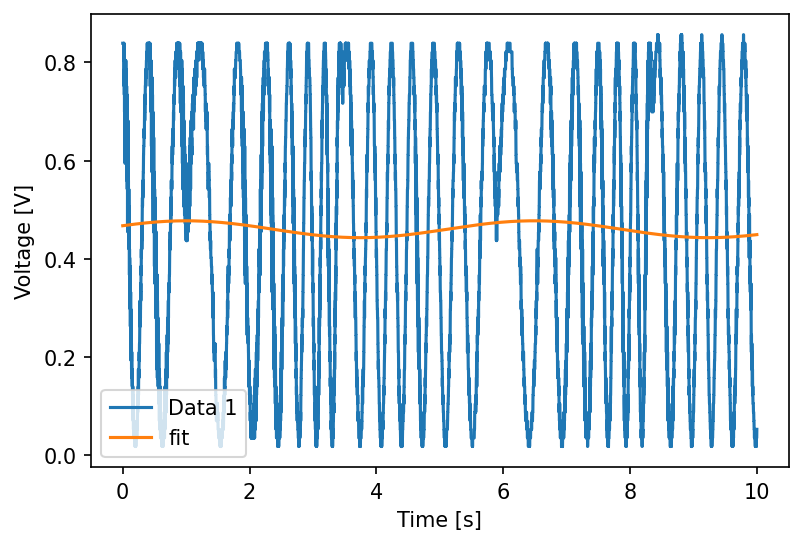

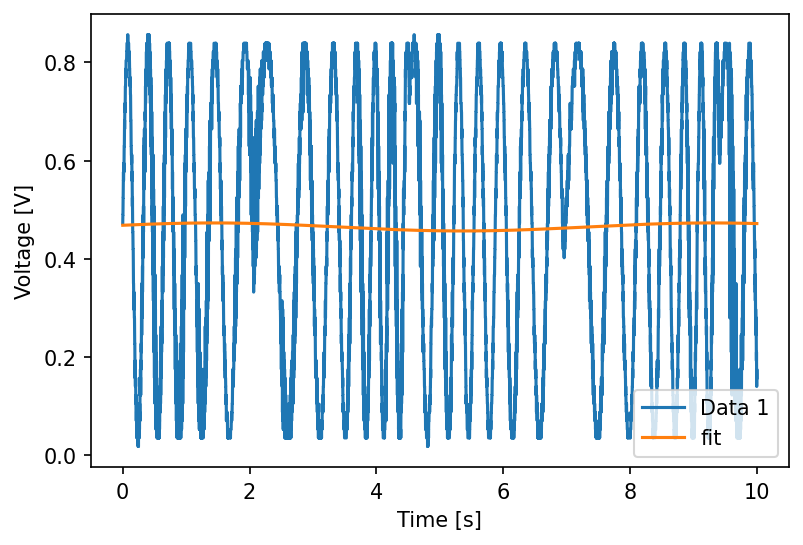

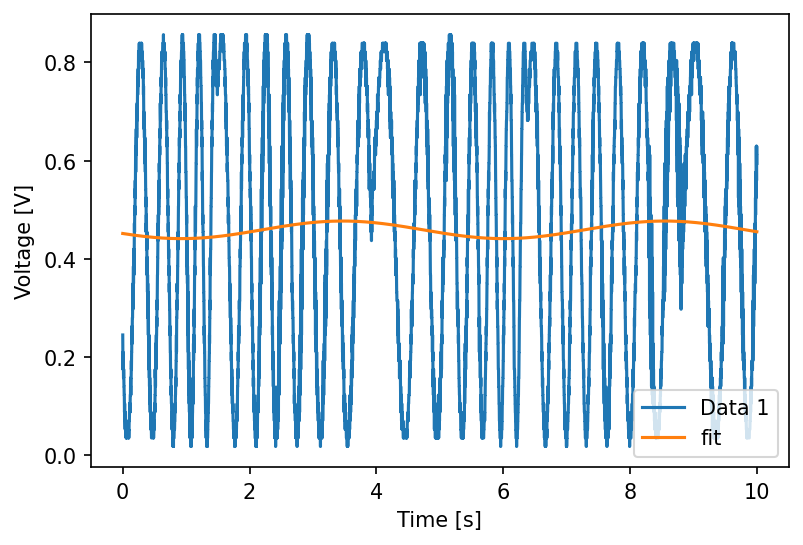

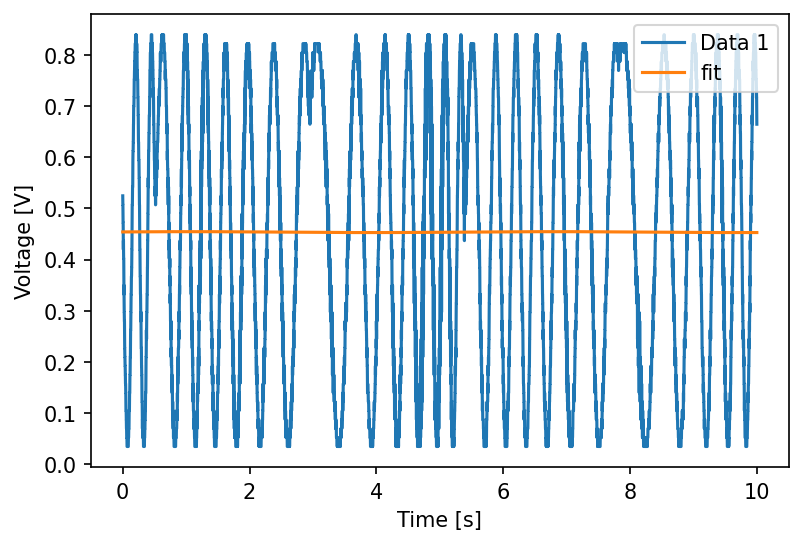

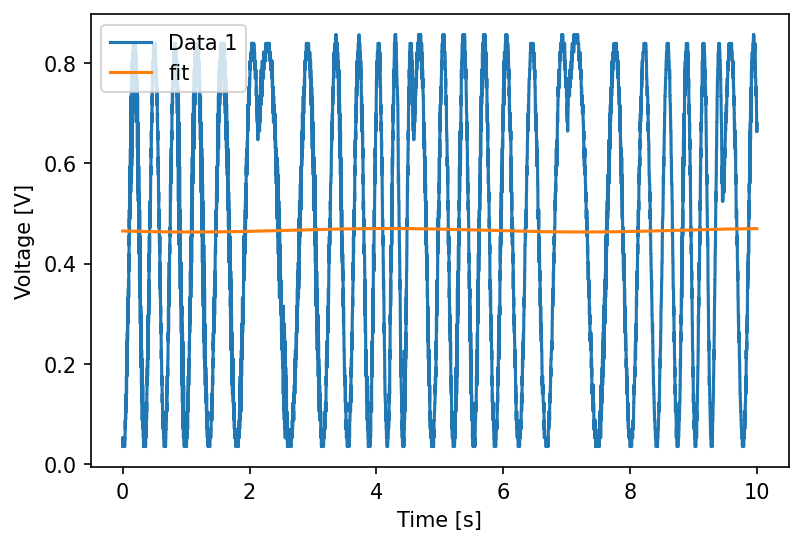

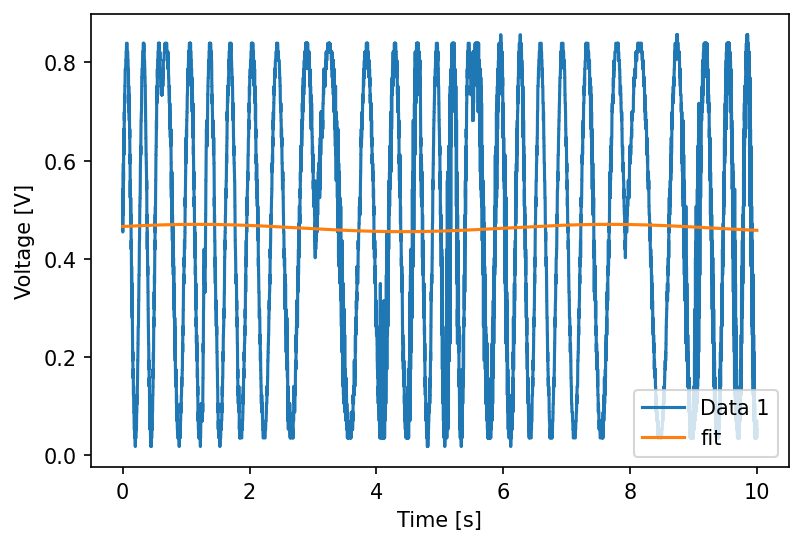

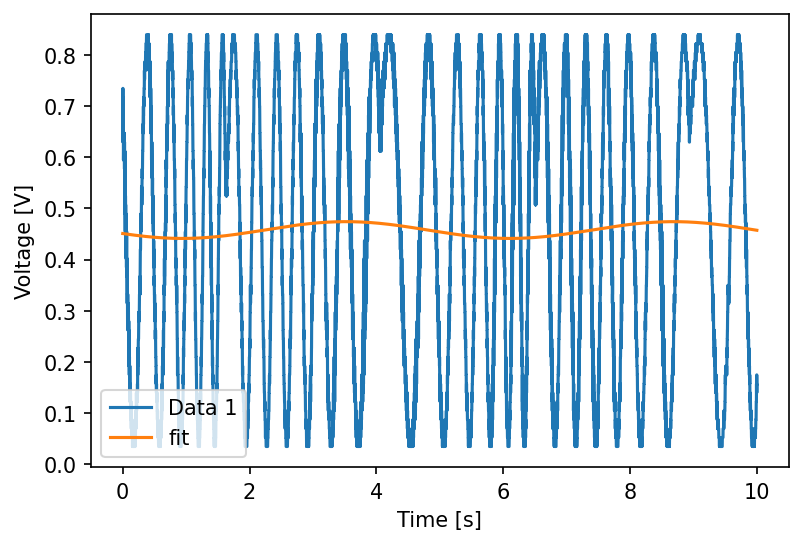

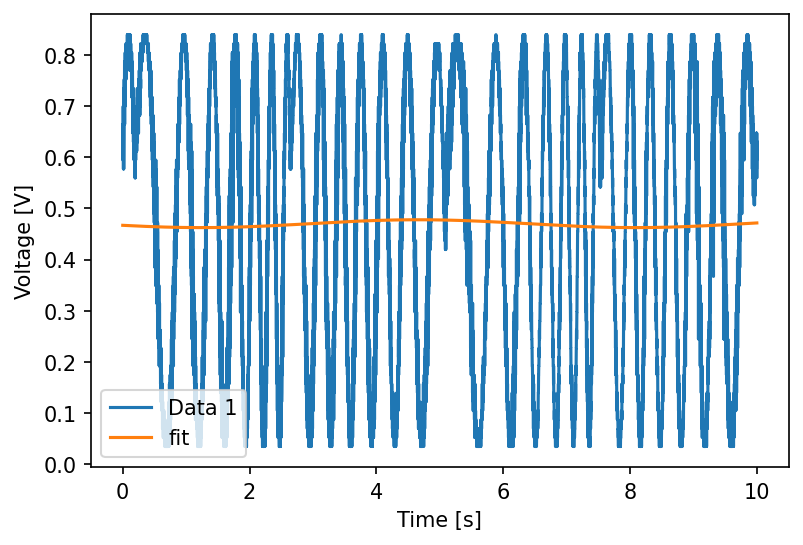

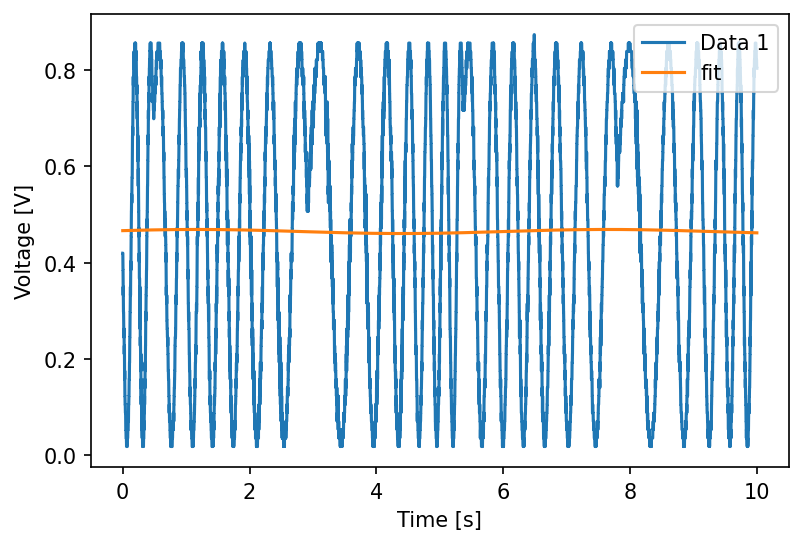

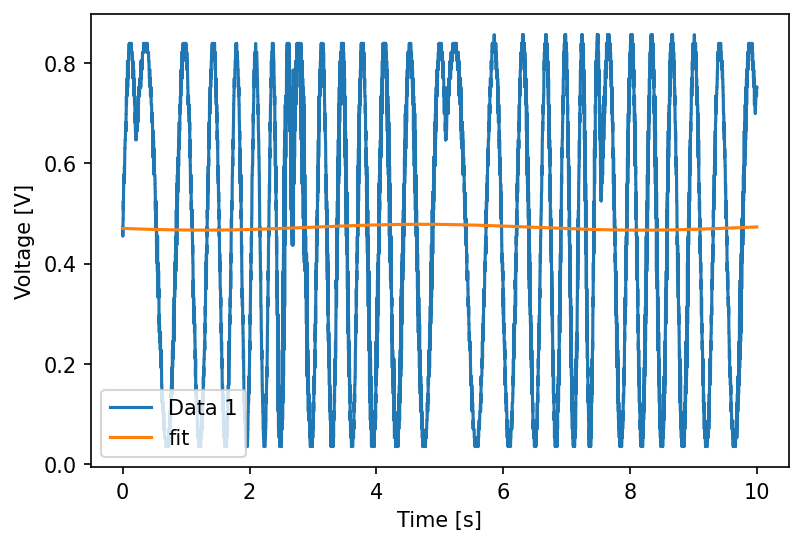

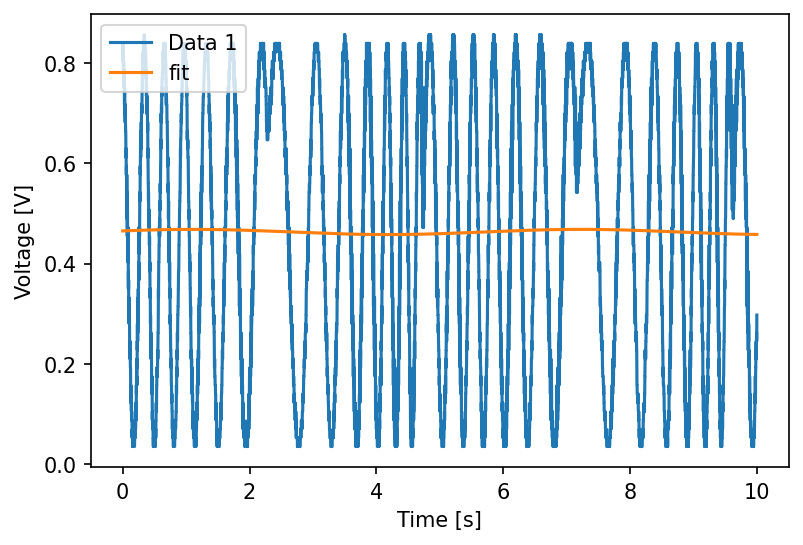

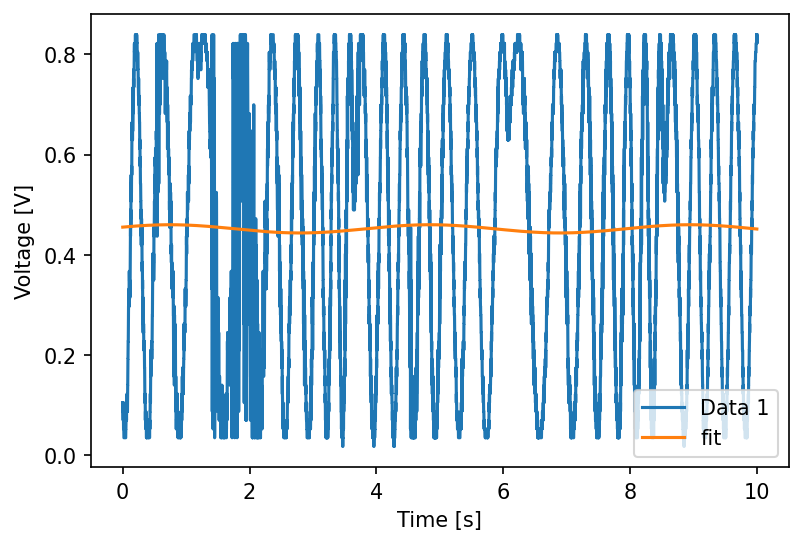

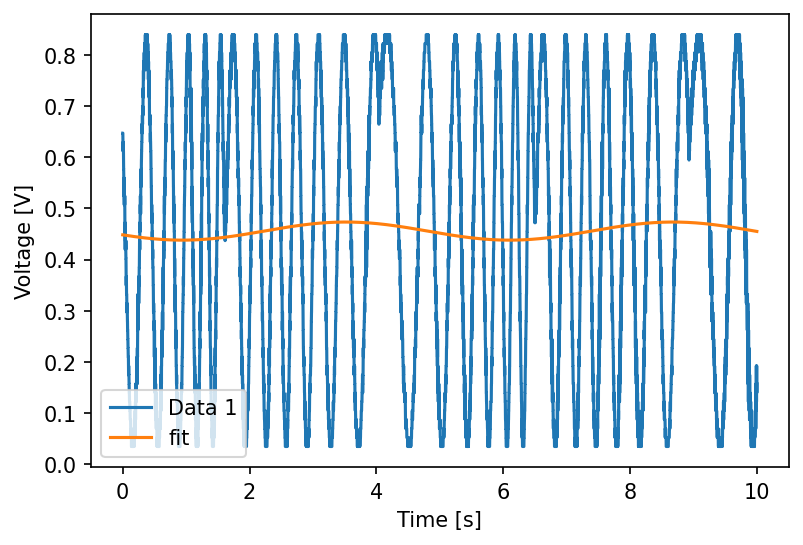

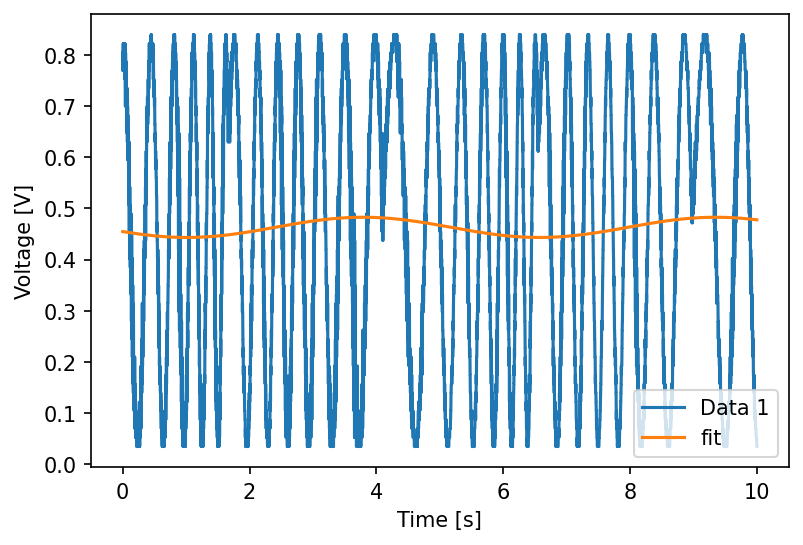

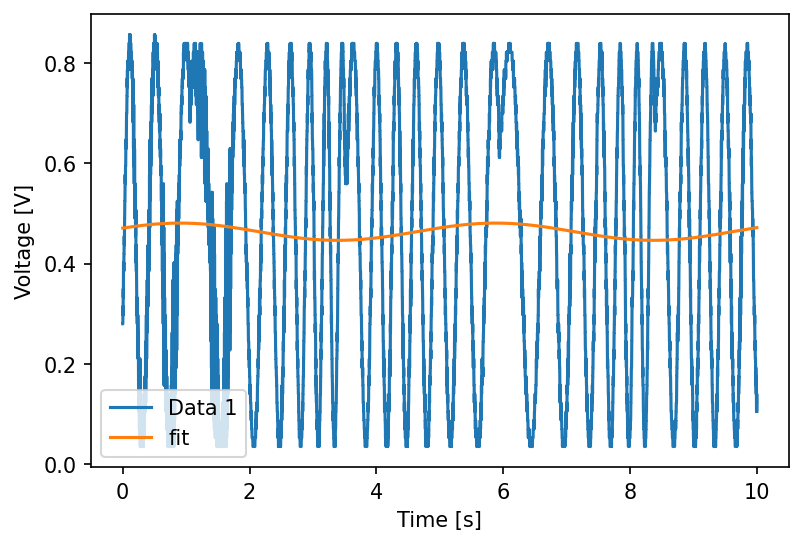

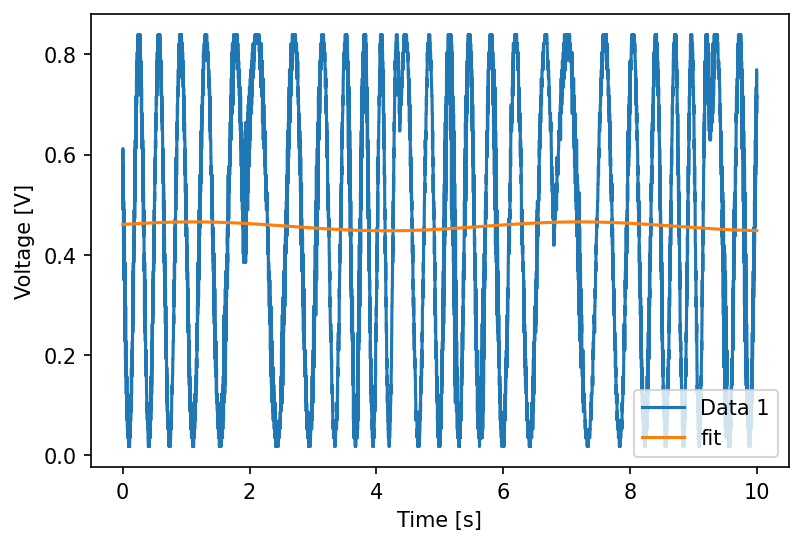

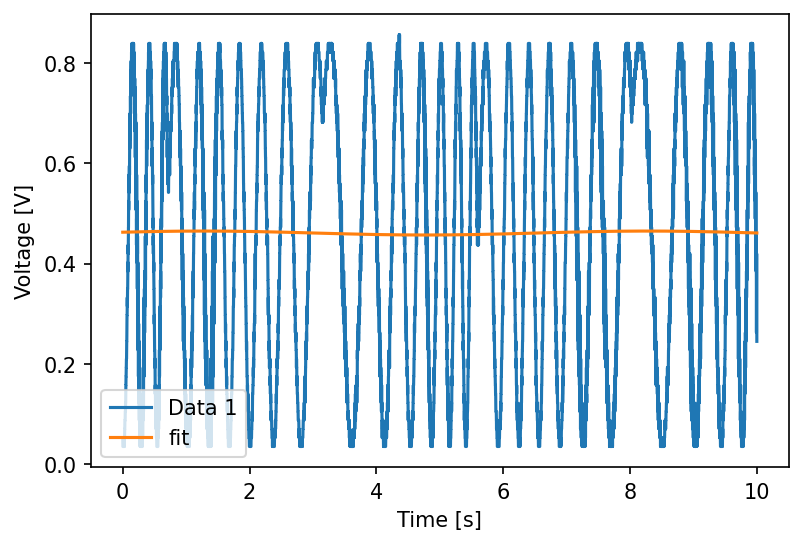

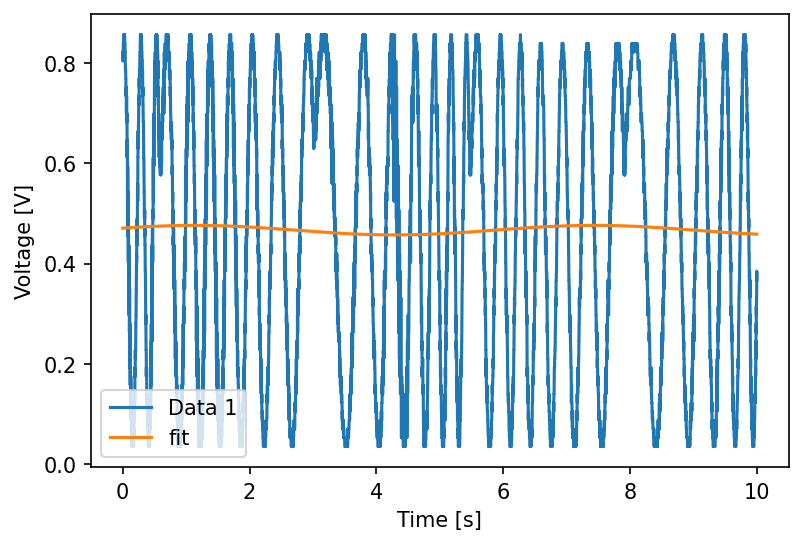

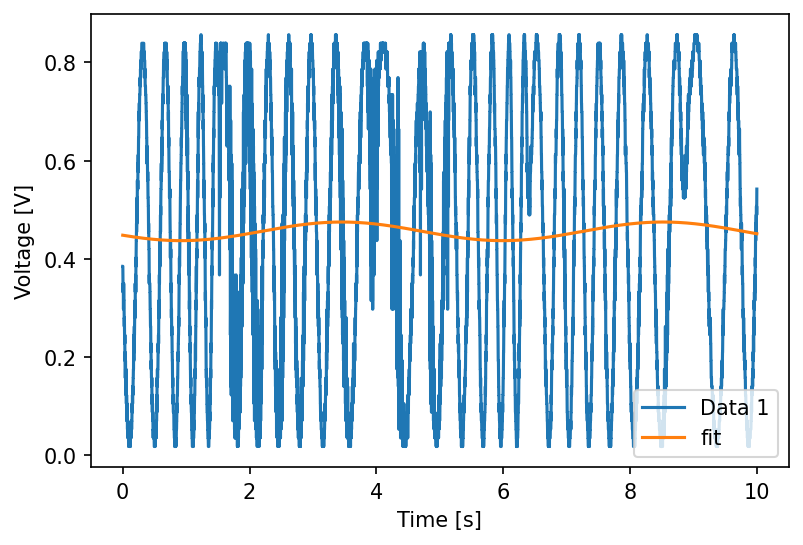

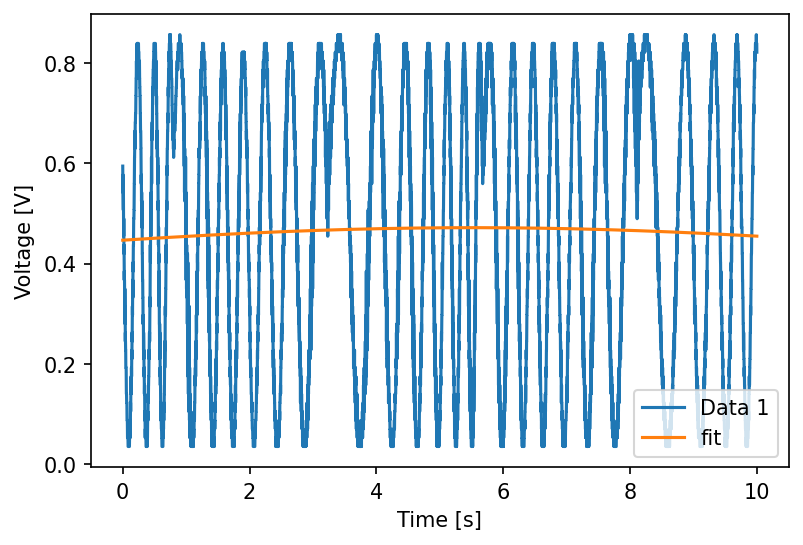

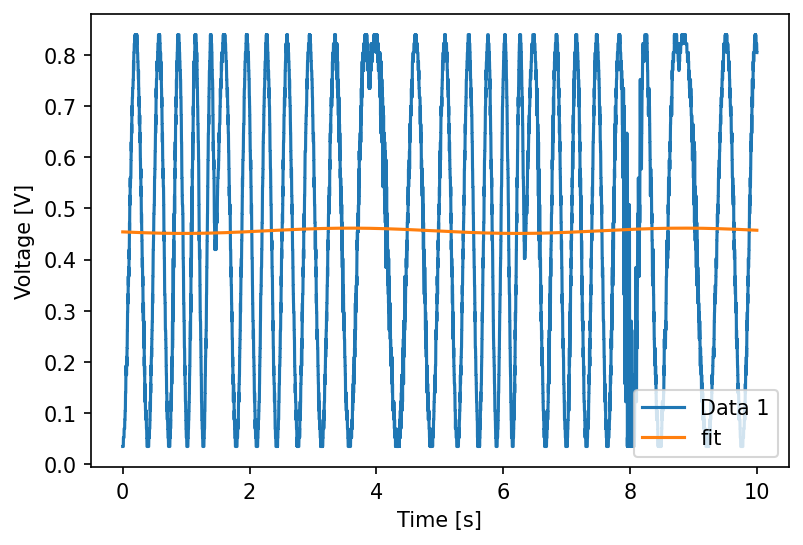

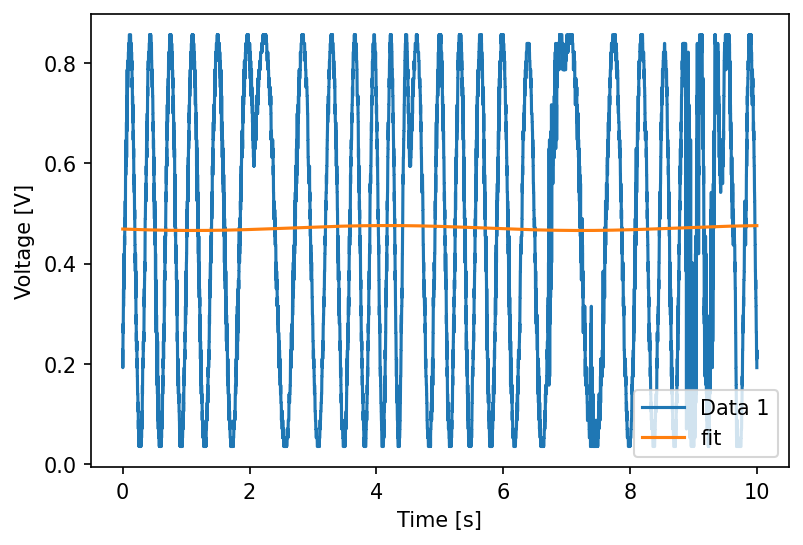

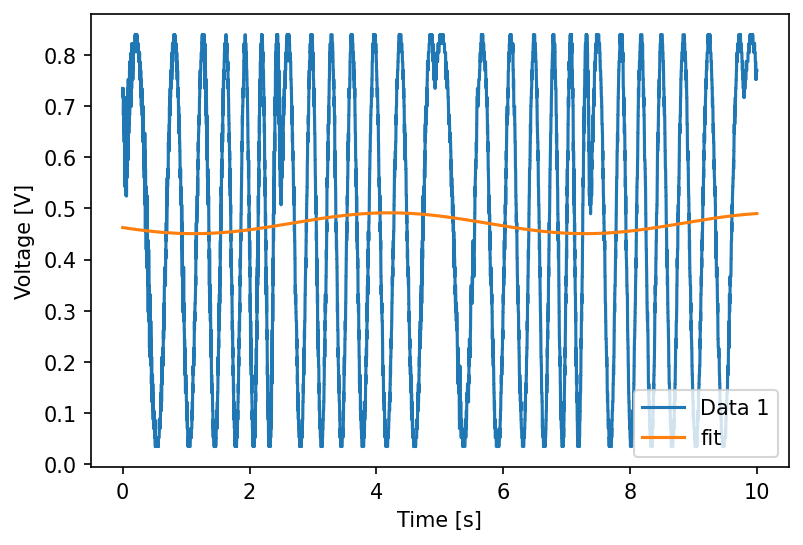

In [30]:
a_guess = 0.7
n_guess = 1
phi_guess = 1
c_guess = 1

p0_1= [a_guess, n_guess, phi_guess, c_guess]

def E1_fit(x,*p): #define fitting function
    a=p[0]
    n=p[1]
    phi=[2]
    c = p[3]
    return a * (1+np.cos(n*x+phi))+c

for Data,Data_name in zip(Data_list,Data_names):
    plt.figure() #plot raw data
    Time=Data[:,0]
    V1=Data[:,1]
    V2=Data[:,2]
    plt.plot(Time, V1, '-', label='Data 1')
    #plt.plot(Time,V2, label='Data 2')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    
    #Do fit to first sine wave, make guesses on amplitide with max(V1)-min(V1), make guess based on frequency written in Data_name float(Data_name[24:27])
    popt1, pcov1 = sp.curve_fit(E1_fit, Time, V1, p0_1) #add them together (v1+v2) to see how the combined wave
    plt.plot(Time, E1_fit(Time,*popt1),'-',label='fit')
    
    plt.legend()

In [ ]:
popt1

array([-0.2210253 ,  2.73840945,  1.        ])